# Loading and Testing Data

In [9]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12m_res7100_mhdcv'
simtype="fire2"

datapath="./fire2_data_pkl/" #this is teh path where the data of our tracked clusters is

plot_path="./plots/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

data_start=596
data_end=665

initial_data=list() #list to store data of all the initial data of different cluster families 
later_data=list() #list to store data of all the later data of different cluster families 

for s in range(data_start,data_end+3,3):
    snap_initial=s #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen
    snap_later=snap_initial+30
    print("This is snap_initial",snap_initial)
    fn_clusters_initial=str(snap_initial)+"clusters_at_snapshot_"+str(snap_initial)+".pkl" 
    fn_clusters_later=str(snap_initial)+"clusters_at_snapshot_"+str(snap_later)+".pkl" 

    with open(datapath+fn_clusters_initial, "rb") as input:
        cluster_data_initial= pickle.load(input)

    with open(datapath+fn_clusters_later, "rb") as input:
        cluster_data_later= pickle.load(input)

    #print("########################## TEST: This is cluster data from second cluster",cluster_data[1])
    print("####################### Total clusters present is",len(cluster_data_initial))
    

    initial_data.append(cluster_data_initial) #appending the dictionaries to the list
    later_data.append(cluster_data_later)
    #colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
    #colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
    #colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

    #total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
    ############################
    ############################
print("\n############## Keys to access the data: \n",cluster_data_initial[1].keys())

This is snap_initial 596
####################### Total clusters present is 5
This is snap_initial 599
####################### Total clusters present is 4
This is snap_initial 602
####################### Total clusters present is 8
This is snap_initial 605
####################### Total clusters present is 7
This is snap_initial 608
####################### Total clusters present is 3
This is snap_initial 611
####################### Total clusters present is 2
This is snap_initial 614
####################### Total clusters present is 9
This is snap_initial 617
####################### Total clusters present is 5
This is snap_initial 620
####################### Total clusters present is 8
This is snap_initial 623
####################### Total clusters present is 2
This is snap_initial 626
####################### Total clusters present is 2
This is snap_initial 629
####################### Total clusters present is 4
This is snap_initial 632
####################### Total clusters present is 6

In [2]:
#Running tests
print((initial_data[1][2]))

{'ind_tracked': array([1975615, 1975614, 1975619, 1975616, 1975613, 1975617]), 'age_tracked': array([0.00090768, 0.00064757, 0.00090768, 0.0007126 , 0.00084266,
       0.00058254]), 'x_tracked': array([5.59530713, 5.59659002, 5.59972326, 5.59616639, 5.59430203,
       5.59884583]), 'y_tracked': array([-0.25222198, -0.25253286, -0.24691885, -0.24818771, -0.25035754,
       -0.24940124]), 'z_tracked': array([0.09497223, 0.09532082, 0.10000915, 0.09774505, 0.09686034,
       0.0982571 ]), 'vx_tracked': array([10.155067  , -0.43777293, -0.36086196,  0.4857459 ,  1.4252217 ,
       -1.0154012 ], dtype=float32), 'vy_tracked': array([227.32014, 235.02887, 223.75081, 226.1228 , 225.92188, 233.1195 ],
      dtype=float32), 'vz_tracked': array([-4.8754745 ,  3.4002318 ,  0.206512  , -0.43380073,  8.423309  ,
       -6.023714  ], dtype=float32), 'mass_tracked': array([13051.117, 16679.316,  8086.727, 14737.691, 14336.003, 10222.016],
      dtype=float32), 'xcm': 5.596494180227444, 'ycm': -0.25024

# R_initial vs R_final to CM of clusters from Galactic Center of individual clusters color coded with [Fe/H] 


/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


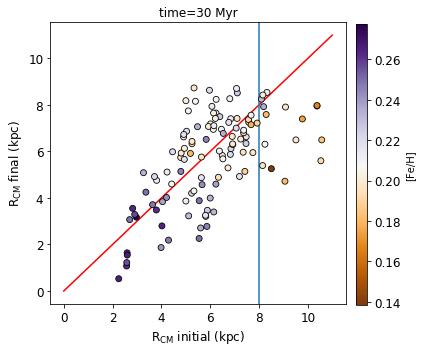

In [6]:
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   

fig1=plt.figure()
fig1.set_size_inches(5,5)
ax1=fig1.add_subplot(111)
plot_name="R_initial_vs_R_final"+simname+"_many_clusters"

initial_R=list() #list to store all the values of initial R from each clusters in each families
later_R=list()
feh=list() #list to store mean feh of each cluster group from each cluster families

for c in range(len(initial_data)):
    
    mean_feh=np.zeros(len(initial_data[c]))
    mean_mgh=np.zeros(len(initial_data[c]))
    R_cm_initial=np.zeros(len(initial_data[c]))
    R_cm_later=np.zeros(len(initial_data[c]))
    cluster_count=0
    for i in range(len(initial_data[c])):                              

        feh_l=initial_data[c][cluster_count+1]["feh_tracked"]
        #mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
        mean_feh[i]=np.mean(feh_l)
        #mean_mgh[i]=np.mean(mgh_l)

        xcm_initial=initial_data[c][cluster_count+1]["xcm"]
        ycm_initial=initial_data[c][cluster_count+1]["ycm"]
        #zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]

        xcm_later=later_data[c][cluster_count+1]["xcm"]
        ycm_later=later_data[c][cluster_count+1]["ycm"]
        #zcm_later=cluster_data_later[cluster_count+1]["zcm"]

        R_cm_initial[i]=(xcm_initial**2+ycm_initial**2)**(0.5)
        R_cm_later[i]=(xcm_later**2+ycm_later**2)**(0.5)
        
        cluster_count+=1
    initial_R.extend(R_cm_initial)
    later_R.extend(R_cm_later)
    feh.extend(mean_feh)


#print(initial_R)

cb1=ax1.scatter(initial_R,later_R,c=feh,cmap=plt.cm.get_cmap('PuOr'), vmin=np.min(feh),vmax=np.max(feh), marker='o', zorder=100, edgecolor='black', linewidth=.8)
ax1.set_ylabel(r"R$_{\rm CM}$ final (kpc)",fontsize=12)
ax1.set_xlabel(r"R$_{\rm CM}$ initial (kpc)",fontsize=12)  
ax1.set_title("time=30 Myr")

xmin,xmax=ax1.get_xlim()
ymin,ymax=ax1.get_ylim()


x=min(xmin,ymin)
y=max(xmax,ymax)
ax1.plot((0,y),(0,y),c="red")
ax1.axvline(x=8)

fig1.subplots_adjust(right=0.89)
cbar_ax = fig1.add_axes([1, 0.14, 0.03, 0.78]) # position of the colorbar (left, bottom, width, height)
fig1.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel('[Fe/H]')
cbar_ax.yaxis.label.set_size(10)
    

plt.tight_layout()   
fig1.savefig("R_initial_vs_R_final_with_Fe_H.png",bbox_inches='tight')
plt.show()

#print("This is how the [Fe/H] values look like",mean_feh)

a=zip(initial_R,later_R,feh)
#print(tuple(a)[9])

# R_initial vs R_final to CM of clusters from Galactic Center of individual clusters color coded with Age

/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


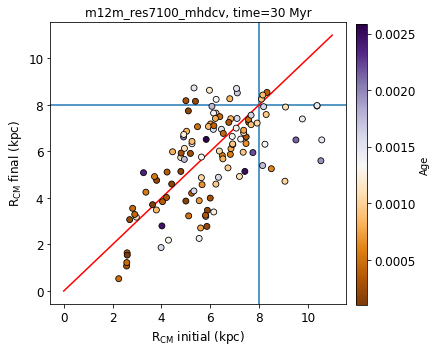

In [10]:
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   

fig1=plt.figure()
fig1.set_size_inches(5,5)
ax1=fig1.add_subplot(111)
plot_name="R_initial_vs_R_final"+simname+"_many_clusters"

initial_R=list() #list to store all the values of initial R from each clusters in each families
later_R=list()
age=list() #list to store mean feh of each cluster group from each cluster families

for c in range(len(initial_data)):
    
    mean_age=np.zeros(len(initial_data[c]))
    
    R_cm_initial=np.zeros(len(initial_data[c]))
    R_cm_later=np.zeros(len(initial_data[c]))
    cluster_count=0
    for i in range(len(initial_data[c])):                              

        age_l=initial_data[c][cluster_count+1]["age_tracked"]
        
        mean_age[i]=np.mean(age_l)
        

        xcm_initial=initial_data[c][cluster_count+1]["xcm"]
        ycm_initial=initial_data[c][cluster_count+1]["ycm"]
        #zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]

        xcm_later=later_data[c][cluster_count+1]["xcm"]
        ycm_later=later_data[c][cluster_count+1]["ycm"]
        #zcm_later=cluster_data_later[cluster_count+1]["zcm"]

        R_cm_initial[i]=(xcm_initial**2+ycm_initial**2)**(0.5)
        R_cm_later[i]=(xcm_later**2+ycm_later**2)**(0.5)
        
        cluster_count+=1
    initial_R.extend(R_cm_initial)
    later_R.extend(R_cm_later)
    age.extend(mean_age)


#print(initial_R)

cb1=ax1.scatter(initial_R,later_R,c=age,cmap=plt.cm.get_cmap('PuOr'), vmin=np.min(age),vmax=np.max(age), marker='o', zorder=100, edgecolor='black', linewidth=.8)
ax1.set_ylabel(r"R$_{\rm CM}$ final (kpc)",fontsize=12)
ax1.set_xlabel(r"R$_{\rm CM}$ initial (kpc)",fontsize=12)  
ax1.set_title(simname+", time=30 Myr")
ax1.axvline(x=8)
ax1.axhline(y=8)

xmin,xmax=ax1.get_xlim()
ymin,ymax=ax1.get_ylim()


x=min(xmin,ymin)
y=max(xmax,ymax)
ax1.plot((0,y),(0,y),c="red")

fig1.subplots_adjust(right=0.89)
cbar_ax = fig1.add_axes([1, 0.14, 0.03, 0.78]) # position of the colorbar (left, bottom, width, height)
fig1.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel('Age')
cbar_ax.yaxis.label.set_size(10)
    

plt.tight_layout()   
fig1.savefig("R_initial_vs_R_final_with_Age.png",bbox_inches='tight')
plt.show()

#print("This is how the [Fe/H] values look like",mean_feh)

a=zip(initial_R,later_R,age)
#print(tuple(a)[9])

# Analysis of R_initial and Final Data

This is the mean delta R in kpc -0.3440048327405877
This is the median delta R in kpc -0.26486252670643395
This is the smallest delta R -4.930005611209846
This is the largest delta R 3.3893637421169904


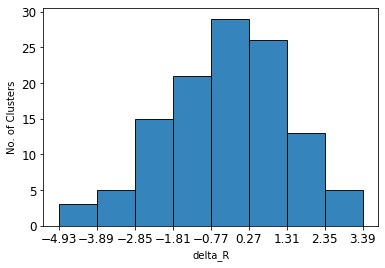

This is the mean Fe/H  0.21592556042039496
This is the median Fe/H 0.21252241730690002
This is the smallest Fe/H 0.13835933804512024
This is the largest Fe/H 0.27731195092201233


([<matplotlib.axis.XTick at 0x7f0cf3613250>,
 <a list of 8 Text xticklabel objects>)

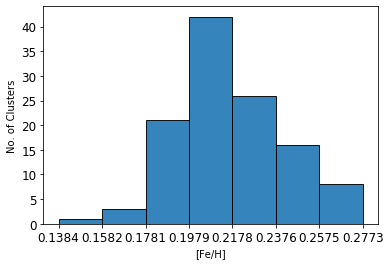

In [6]:
delta_R=np.array(later_R)-np.array(initial_R)
print("This is the mean delta R in kpc",np.mean(delta_R))
print("This is the median delta R in kpc",np.median(delta_R))
print("This is the smallest delta R",np.min(delta_R))
print("This is the largest delta R",np.max(delta_R))
n,bins,edges=plt.hist(delta_R,bins=8,ec="black",alpha=0.9)
plt.xticks(bins)
plt.xlabel("delta_R")
plt.ylabel("No. of Clusters")
plt.show()


print("This is the mean Fe/H ",np.mean(feh))
print("This is the median Fe/H",np.median(feh))
print("This is the smallest Fe/H",np.min(feh))
print("This is the largest Fe/H",np.max(feh))
n,bins,edges=plt.hist(feh,bins=7,ec="black",alpha=0.9)
plt.xlabel("[Fe/H]")
plt.ylabel("No. of Clusters")
plt.xticks(bins)



# [Fe/H] and [Mg/H\] over the delta r_xy (ie. the difference of the distance to the CM of the cluster from the galactic center)

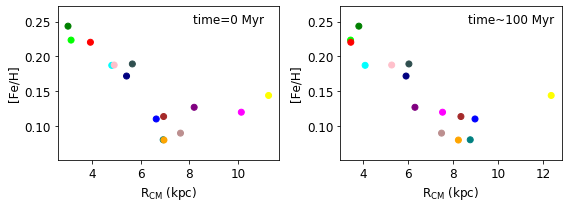

In [53]:
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy']   

cluster_count=0

fig1=plt.figure()
fig1.set_size_inches(8,3)
ax2=fig1.add_subplot(121)
ax1=fig1.add_subplot(122)
plot_name="feh_vs_radius"+simname+"_cluster_"+str(cluster_count+1)

mean_feh=np.zeros(len(cluster_data_initial))
mean_mgh=np.zeros(len(cluster_data_initial))
R_cm_initial=np.zeros(len(cluster_data_initial))
R_cm_later=np.zeros(len(cluster_data_later))

for i in range(len(cluster_data_initial)):                              
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    mean_feh[i]=np.mean(feh_l)
    mean_mgh[i]=np.mean(mgh_l)
    
    xcm_initial=cluster_data_initial[cluster_count+1]["xcm"]
    ycm_initial=cluster_data_initial[cluster_count+1]["ycm"]
    zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]
    
    xcm_later=cluster_data_later[cluster_count+1]["xcm"]
    ycm_later=cluster_data_later[cluster_count+1]["ycm"]
    zcm_later=cluster_data_later[cluster_count+1]["zcm"]
    
    R_cm_initial[i]=(xcm_initial**2+ycm_initial**2)**(0.5)
    R_cm_later[i]=(xcm_later**2+ycm_later**2)**(0.5)
    

    cluster_count+=1

ax2.scatter(R_cm_initial,mean_feh,c=colors)
ax2.set_xlabel(r"R$_{\rm CM}$ (kpc)",fontsize=12)
ax2.set_ylabel("[Fe/H]",fontsize=12)  
ax2.set_title("time=0 Myr",x=0.77,y=0.98, pad=-14)

    
ax1.scatter(R_cm_later,mean_feh,c=colors)    
ax1.set_xlabel(r"R$_{\rm CM}$ (kpc)",fontsize=12)
ax1.set_ylabel("[Fe/H]",fontsize=12)  
ax1.set_title("time~100 Myr",x=0.77,y=0.98, pad=-14)

plt.tight_layout()   
#fig1.savefig("Average_Metallicity_with_Radius_cylindrical.png",dpi=200)
plt.show()

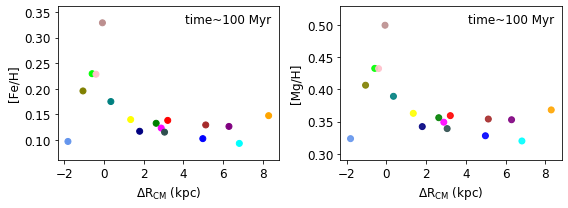

In [66]:
from matplotlib import rc
matplotlib.rc('text', usetex=False)
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0

fig1=plt.figure()
fig1.set_size_inches(8,3)
ax2=fig1.add_subplot(121)
ax1=fig1.add_subplot(122)
plot_name="feh_vs_radius"+simname+"_cluster_"+str(cluster_count+1)

mean_feh=np.zeros(len(cluster_data_initial))
mean_mgh=np.zeros(len(cluster_data_initial))

delta_R_cm=np.zeros(len(cluster_data_initial))
R_cm_initial=np.zeros(len(cluster_data_initial))
R_cm_later=np.zeros(len(cluster_data_initial))
for i in range(len(cluster_data_initial)):                              
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    mean_feh[i]=np.mean(feh_l)
    mean_mgh[i]=np.mean(mgh_l)
    
    xcm_initial=cluster_data_initial[cluster_count+1]["xcm"]
    ycm_initial=cluster_data_initial[cluster_count+1]["ycm"]
    zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]
    
    xcm_later=cluster_data_later[cluster_count+1]["xcm"]
    ycm_later=cluster_data_later[cluster_count+1]["ycm"]
    zcm_later=cluster_data_later[cluster_count+1]["zcm"]
    
    R_cm_initial[i]=((xcm_initial)**2+(ycm_initial)**2)**(0.5)
    R_cm_later[i]=((xcm_later)**2+(ycm_later)**2)**(0.5)
    
    #delta_R_cm[i]=((xcm_initial-xcm_later)**2+(ycm_initial-ycm_later)**2+())**(0.5)
    delta_R_cm[i]=R_cm_later[i]-R_cm_initial[i]

    cluster_count+=1

ax2.scatter(delta_R_cm,mean_feh,c=colors)
ax2.set_xlabel(r"$\rm{\Delta}R_{CM}$ (kpc)",fontsize=12) #\rm prevents the italicizing of the subscript :)
ax2.set_ylabel("[Fe/H]",fontsize=12)  
ax2.set_title("time~100 Myr",x=0.77,y=0.98, pad=-14)

    
ax1.scatter(delta_R_cm,mean_mgh,c=colors,alpha=0.9)    
ax1.set_xlabel(r"$\rm{\Delta}R_{CM}$ (kpc)",fontsize=12)
ax1.set_ylabel("[Mg/H]",fontsize=12)  
ax1.set_title("time~100 Myr",x=0.77,y=0.98, pad=-14)

plt.tight_layout()   
fig1.savefig("Average_Metallicity_with_delta_R_CM.png",dpi=200)
plt.show()

# Mean Mg/H of individual clusters before and after

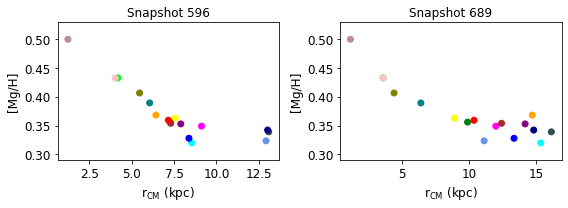

In [39]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0

fig1=plt.figure()
fig1.set_size_inches(8,3)
ax2=fig1.add_subplot(121)
ax1=fig1.add_subplot(122)
plot_name="feh_vs_radius"+simname+"_cluster_"+str(cluster_count+1)

mean_feh=np.zeros(len(cluster_data_initial))
mean_mgh=np.zeros(len(cluster_data_initial))
r_cm_initial=np.zeros(len(cluster_data_initial))
r_cm_later=np.zeros(len(cluster_data_later))

for i in range(len(cluster_data_initial)):                              
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    mean_feh[i]=np.mean(feh_l)
    mean_mgh[i]=np.mean(mgh_l)
    
    xcm_initial=cluster_data_initial[cluster_count+1]["xcm"]
    ycm_initial=cluster_data_initial[cluster_count+1]["ycm"]
    zcm_initial=cluster_data_initial[cluster_count+1]["zcm"]
    
    xcm_later=cluster_data_later[cluster_count+1]["xcm"]
    ycm_later=cluster_data_later[cluster_count+1]["ycm"]
    zcm_later=cluster_data_later[cluster_count+1]["zcm"]
    
    r_cm_initial[i]=(xcm_initial**2+ycm_initial**2+zcm_initial**2)**(0.5)
    r_cm_later[i]=(xcm_later**2+ycm_later**2+zcm_later**2)**(0.5)
    
    cluster_count+=1

ax2.scatter(r_cm_initial,mean_mgh,c=colors)
ax2.set_xlabel(r"r$_{\rm CM}$ (kpc)",fontsize=12)
ax2.set_ylabel("[Mg/H]",fontsize=12)  
ax2.set_title("Snapshot 596")

    
ax1.scatter(r_cm_later,mean_mgh,c=colors)    
ax1.set_xlabel(r"r$_{\rm CM}$ (kpc)",fontsize=12)
ax1.set_ylabel("[Mg/H]",fontsize=12)  
ax1.set_title("Snapshot 689")

plt.tight_layout()   
fig1.savefig("Average_MgH_with_Radius.png")
plt.show()

# Metallicity Histogram of Stars in all clusters


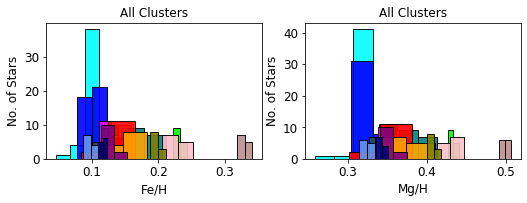

In [98]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
fig1.set_size_inches(8.5,2.5)
ax1=fig1.add_subplot(121)
ax2=fig1.add_subplot(122)
for i in range(len(cluster_data_initial)):                              
    
    #ax1=fig1.add_subplot(212)
    
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    
    plot_name="feh_histogram"+simname+"_cluster_"+str(cluster_count+1)
    n,bins,edges=ax1.hist(feh_i,bins=int(len(feh_i)**(1/3)),color=colors[i],ec="black",alpha=0.9)
    ax1.set_xlabel("Fe/H",fontsize=12)
    ax1.set_ylabel("No. of Stars",fontsize=12)  
    ax1.set_title("All Clusters")
    #ax1.set_xticks(bins)
    
    n,bins,edges=ax2.hist(mgh_i,bins=int(len(feh_i)**(1/3)),color=colors[i],ec="black",alpha=0.9)
    ax2.set_xlabel("Mg/H",fontsize=12)
    ax2.set_ylabel("No. of Stars",fontsize=12)  
    ax2.set_title("All Clusters")
    
    #fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
    
    #plt.tight_layout()
    #fig1.clf()
    #break
    cluster_count+=1
plt.show()

# Fe/H Scatter Plot each clusters

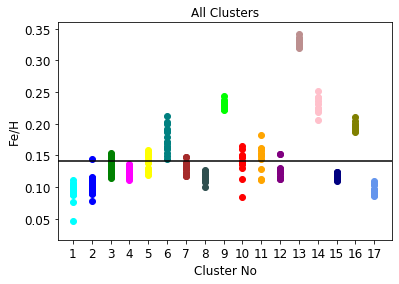

In [31]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
all_fe=list()
for i in range(len(cluster_data_initial)):                              
    #ax1=fig1.add_subplot(212)
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    list.extend(all_fe,list(feh_i))
    plot_name="feh_scatter"+simname+"_cluster_"+str(cluster_count+1)
    x_values=np.ones(len(feh_i))*(cluster_count+1)
    ax2.scatter(x_values,feh_i,color=colors[i],label="cluster "+str(cluster_count+1))
    #ax2.axhline(y=average,c=colors[i])
    ax2.set_xlabel("Cluster No",fontsize=12)
    ax2.set_ylabel("Fe/H",fontsize=12)  
    ax2.set_title("All Clusters")
    ax2.set_xticks(np.arange(1,18,1))
    #ax2.legend("upper right")
    #n,bins,edges=ax1.hist(feh_l,bins=3,color=colors[i],ec="black")
    #ax1.set_xticks(bins)
    #fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
    #plt.tight_layout()
    #fig1.clf()
    #break
    cluster_count+=1
#print(all_fe)
ax2.axhline(y=np.mean(np.array(all_fe)),c="black")
fig1.savefig("Fe_H all Clusters.png")
plt.show()

# Fe/H Box Plot each clusters

{}


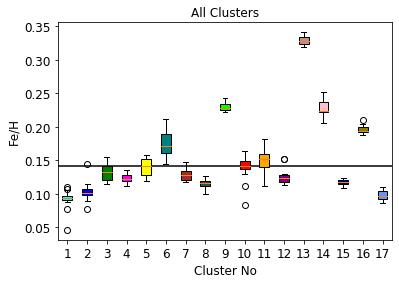

In [47]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
all_fe_each=list()
all_fe=list()
box_colors=dict()
print(box_colors)
for i in range(len(cluster_data_initial)):                              
    
    #ax1=fig1.add_subplot(212)
    
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    list.append(all_fe_each,list(feh_i))
    list.extend(all_fe,list(feh_i))
    plot_name="feh_scatter"+simname+"_cluster_"+str(cluster_count+1)
    x_values=np.ones(len(feh_i))*(cluster_count+1)
    
    #ax2.axhline(y=average,c=colors[i])
    ax2.set_xlabel("Cluster No",fontsize=12)
    ax2.set_ylabel("Fe/H",fontsize=12)  
    ax2.set_title("All Clusters")
    
    cluster_count+=1
#print(np.array(all_fe))
ax2.axhline(y=np.mean(np.array(all_fe)),c="black")
box=ax2.boxplot(all_fe_each,patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
fig1.savefig("Fe_H_all_Clusters_Quartiles_Outliers.png")
plt.show()

# Mg/H

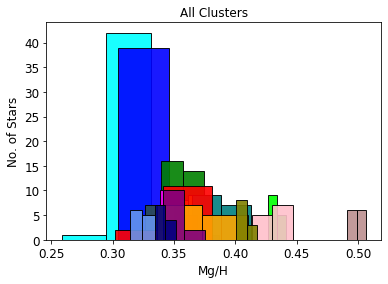

In [85]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
for i in range(len(cluster_data_initial)):                              
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    
    plot_name="mgh_histogram"+simname+"_cluster_"+str(cluster_count+1)
    n,bins,edges=ax2.hist(mgh_i,bins=int(len(feh_i)**(1/3)),color=colors[i],ec="black",alpha=0.9)
    ax2.set_xlabel("Mg/H",fontsize=12)
    ax2.set_ylabel("No. of Stars",fontsize=12)  
    ax2.set_title("All Clusters")
    #ax2.set_xticks(bins)
    
    #n,bins,edges=ax1.hist(feh_l,bins=3,color=colors[i],ec="black")
    #ax1.set_xticks(bins)
    
    
    #fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
    
    #plt.tight_layout()
    #fig1.clf()
    #break
    cluster_count+=1
plt.show()

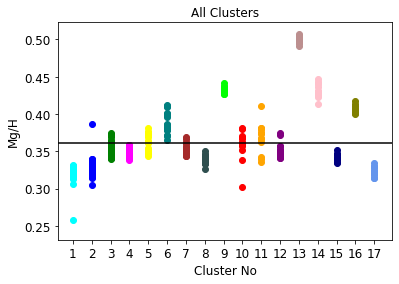

In [40]:
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']   
cluster_count=0
fig1=plt.figure()
#fig1.set_size_inches(7,5)
ax2=fig1.add_subplot(111)
all_mg=list()
for i in range(len(cluster_data_initial)):                              
    
    #ax1=fig1.add_subplot(212)
    
    feh_i=cluster_data_initial[cluster_count+1]["feh_tracked"]
    mgh_i=cluster_data_initial[cluster_count+1]["mgh_tracked"]
    
    feh_l=cluster_data_later[cluster_count+1]["feh_tracked"]
    mgh_l=cluster_data_later[cluster_count+1]["mgh_tracked"]
    list.extend(all_mg,list(mgh_i))
    plot_name="mgh_scatter"+simname+"_cluster_"+str(cluster_count+1)
    x_values=np.ones(len(mgh_i))*(cluster_count+1)
    ax2.scatter(x_values,mgh_i,color=colors[i],label="cluster "+str(cluster_count+1))
    #ax2.axhline(y=average,c=colors[i])
    ax2.set_xlabel("Cluster No",fontsize=12)
    ax2.set_ylabel("Mg/H",fontsize=12)  
    ax2.set_title("All Clusters")
    ax2.set_xticks(np.arange(1,18,1))
    
    cluster_count+=1
#print(all_fe)
ax2.axhline(y=np.mean(np.array(all_mg)),c="black")
plt.show()

# Plotting x vs y for a given cluster group

In [17]:
print(len(later_data[0]))

15


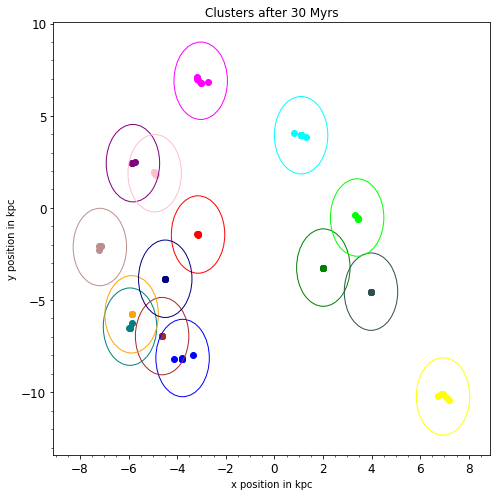

In [56]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
total_clusters=len(later_data[0])
fig11 = plt.figure(figsize=(7,7))
#fig1.suptitle("Cylindrical component of the velocity of Cluster Groups from Snapshot 596")
cluster_count=0
#plot_count=0
ax = fig11.add_subplot(1,1,1)

for i in range(total_clusters):

    x=later_data[0][cluster_count+1]["x_tracked"]
    y=later_data[0][cluster_count+1]["y_tracked"]
    xcm=later_data[0][cluster_count+1]["xcm"]
    ycm=later_data[0][cluster_count+1]["ycm"]
    z=later_data[0][cluster_count+1]["z_tracked"]
    
    s1=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=colors[cluster_count])
    #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    ax.minorticks_on()
    ax.set_xlabel("x position in kpc")
    ax.set_ylabel("y position in kpc")
    ax.set_title("Clusters after 30 Myrs")
    
    xy=zip(x,y)
    xy_array=np.array(tuple(xy))
    xc=xcm
    yc=ycm
    theta=3.1415
    a=1.1
    b=2.1
    ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
    ax.add_patch(ell_patch)
    '''
    ell = EllipseModel()
    e=ell.estimate(xy_array)
    if(e==True):
        xc, yc, a, b, theta = ell.params
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor='red', facecolor='none')
        ax.add_patch(ell_patch)
    '''
    cluster_count+=1 
    
    
#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
    
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")
plt.tight_layout()
plt.show()

In [46]:
xy=zip(x,y)
xy_array=np.array(tuple(xy))
ell = EllipseModel()
ell.estimate(xy_array)

False